In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import networkx as nx
import pickle

In [9]:
import os
import sys
sys.path.insert(0, os.path.abspath('../../code/'))
from utils.network_tools import compute_graph_measures

In [13]:
file = '../local/causal_graphs/hcp100_causalFCs_rest_scan2'
with open(file, "rb") as input_file:
    causal_fcs = pickle.load(input_file)
causal_fcs.shape

(426, 100, 100)

In [20]:
fcs = np.load('../local/fcs/unfiltered/fcs_100_unrelated.npy')
print(fcs.shape)
fcs_scan2 = fcs[1::2]
print(fcs_scan2.shape)

(852, 100, 100)
(426, 100, 100)


In [21]:
labels = np.load('../local/gender_labels/unrelated_gender_labels.npy')
print(labels.shape)
labels_scan2 = labels[1::2]
print(labels_scan2.shape)

(852,)
(426,)


In [23]:
sfcs = np.where(causal_fcs!=0, fcs_scan2, 0)

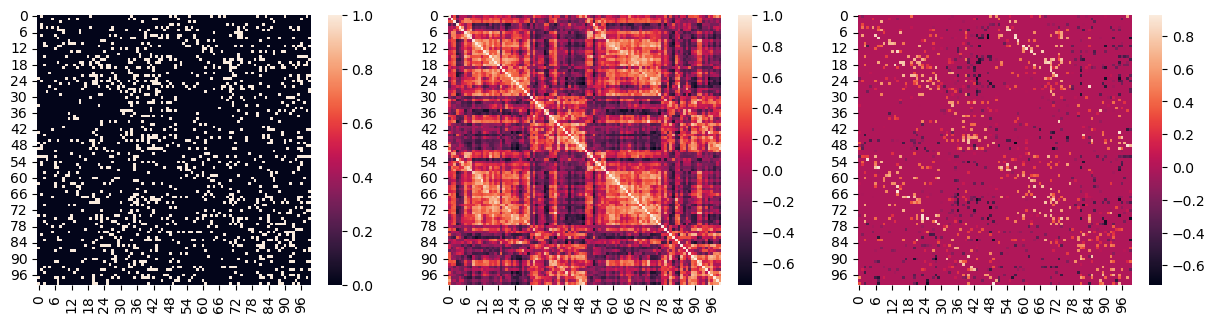

In [24]:
plt.figure(figsize=(15,3.5))
ax = plt.subplot(131)
sns.histplot(densities)
ax = plt.subplot(132)
sns.heatmap(fcs[0])
ax = plt.subplot(133)
sns.heatmap(sfcs[0])
plt.show()

In [29]:
connectedness = np.zeros(sfcs.shape[0])
for idx, A in enumerate(sfcs):
    G = nx.from_numpy_array(A)
    connectedness[idx] = nx.is_connected(G)
print(f'Connected Graphs: {int(connectedness.sum())}')

Connected Graphs: 426


In [32]:
np.save('../local/causal_graphs/processed/causal_fcs.npy', causal_fcs)
np.save('../local/causal_graphs/processed/filtered_fcs.npy', sfcs)
np.save('../local/causal_graphs/processed/causal_labels.npy', labels_scan2)